<div id="container" style="position:relative;">
<div style="float:left"><h1> Python Project Sprint - Part 1 </h1></div>
<div style="position:relative; float:right">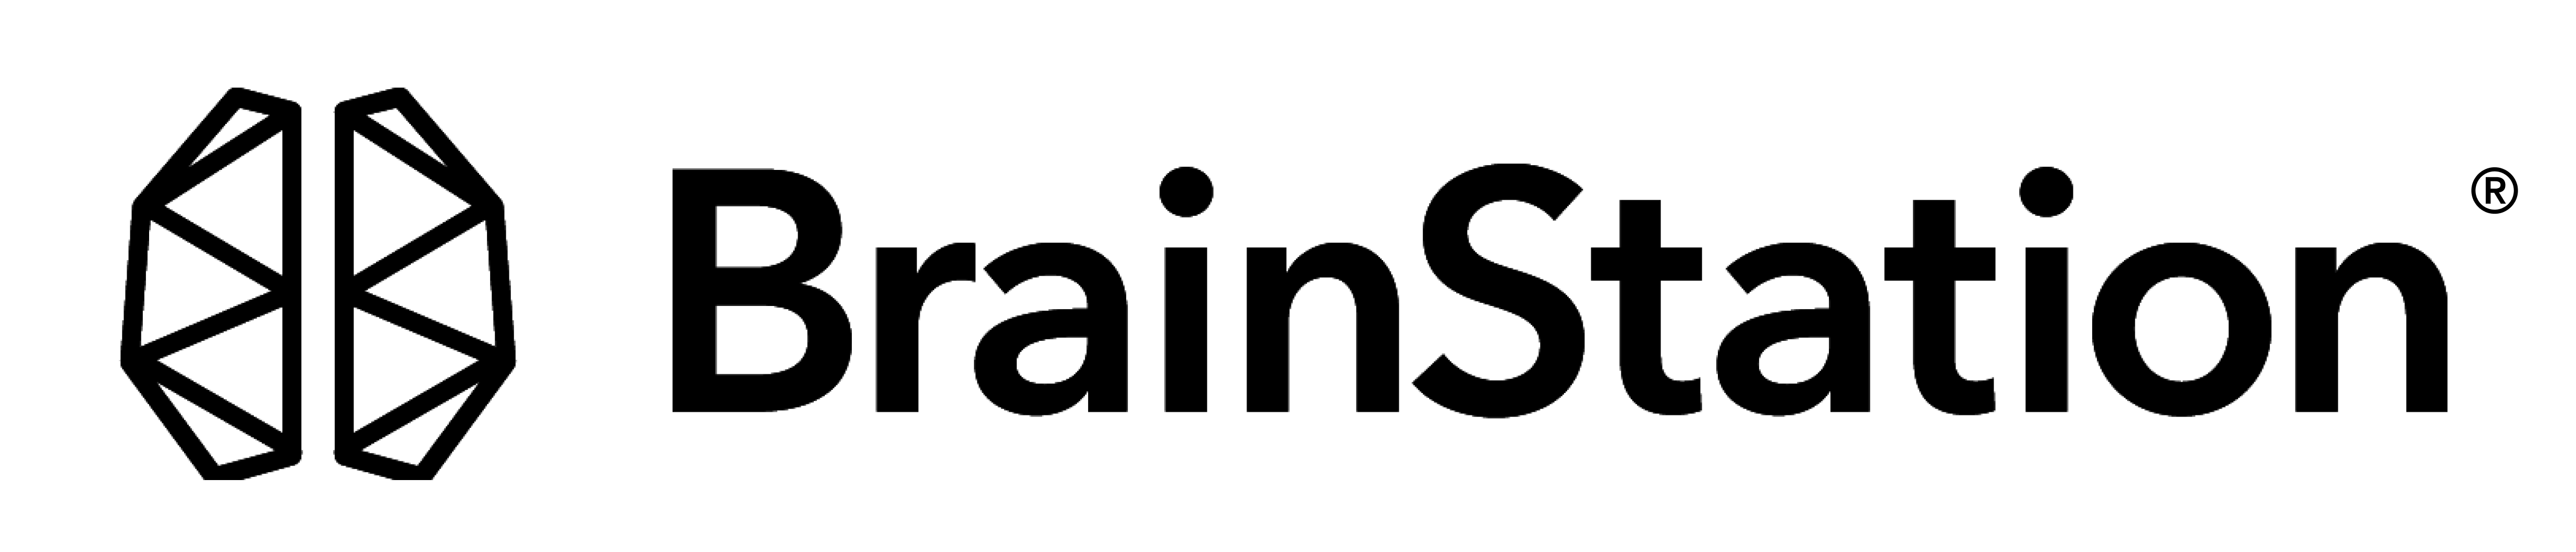
</div>
</div>


# **Timi Olaoye**  
### **July 16th, 2025**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Your Experience Matters
We require every learner to participate in a
Course Experience Survey twice during their course so we can ensure you are meeting your learning goals and having the best possible experience.

Please take 10 minutes to rate how you've enjoyed the Course so far by going to **Synapse → Experience Survey**.

# E-commerce Dataset Overview

In this Python Project Sprint, we'll be working with a dataset derived from an online e-commerce platform. The dataset captures customer purchase records, reflecting the shopping behavior and interactions of users. It includes important details such as purchase dates, product categories, amounts spent, customer demographics, and payment methods.

This dataset is a valuable tool for:

1. Identifying popular product categories and purchase trends.
2. Analyzing customer spending patterns and behaviors.
3. Examining transaction frequency and payment preferences.
4. Building recommender systems and planning marketing strategies.

You can find the data dictionary for this dataset below.

---

## Data Dictionary

| Column Name               | Data Type | Description                                                                                     |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------|
| `Customer ID`             | int       | Unique identifier for each customer.                                                            |
| `Age`                     | string    | Customer's age in years. |
| `Gender`                  | string    | Gender of the customer.                                         |
| `Item Purchased`          | string    | Name of the item purchased by the customer.                     |
| `Category`                | string    | Product category the item belongs to.                                                           |
| `Purchase Amount (USD)`   | float     | The amount of money spent on the purchase, in USD.                                              |
| `Location`                | string    | The customer's location (state or region).                          |
| `Size`                    | string    | Size of the purchased item (e.g., S, M, L).                                                     |
| `Color`                   | string    | Color of the purchased item.                                                                    |
| `Discount Applied`        | string    | Indicates if a discount was applied ("Yes" or "No").                                            |
| `Promo Code Used`         | string    | Indicates if a promotional code was used ("Yes" or "No").                                       |
| `Previous Purchases`      | float     | Number of previous purchases made by the customer.                                              |
| `Payment Method`          | string    | Payment method used by the customer.         |
| `Frequency of Purchases`  | string    | Frequency of purchases by the customer (e.g., Weekly, Monthly).                       |
| `user id`                 | float     | ID of the user associated with the purchase.    |
| `product id`              | string    | Unique identifier for the purchased product.    |
| `Interaction type`        | string    | Type of interaction the customer had with the product (e.g., purchase, view, like).             |
| `Time stamp`              | string    | Date and time of the transaction or interaction (in DD/MM/YYYY HH:MM format).                   |

# Data Cleaning

To begin our analysis of the dataset, we will first inspect and clean it. The data cleaning process will involve adjusting data types, removing null values, removing duplicates, normalizing text columns, and dropping redundant columns.

Firstly, we will load the data to do an initial inspection and determine the number of rows and columns it contains.

In [8]:
# Load the dataset
df = pd.read_csv('e-commerce.csv')

# Evaluate the dataset
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,0,1,"55,0",Male,bLOuSE,Clothing,53,KeNtUCkY,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo\n,Fortnightly,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,1,2,"19,0",Male,SWEaTer,Clothing,64,MaINe,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash\n,Fortnightly,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,2,3,"50,0",Male,jeaNS,Clothing,73,MASSAcHUsetTs,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card\n,Weekly,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,3,4,"21,0",Male,saNdals,Footwear,90,RHodE IsLAnD,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal\n,Weekly,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,4,5,"45,0",Male,BLoUSE,Clothing,49,OReGON,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal\n,Annually,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


In [10]:
# Shape of dataset
df.shape

(3009, 24)

In [11]:
df.info

<bound method DataFrame.info of       Unnamed: 0  Customer ID   Age Gender Item Purchased     Category  \
0              0            1  55,0   Male         bLOuSE     Clothing   
1              1            2  19,0   Male        SWEaTer     Clothing   
2              2            3  50,0   Male          jeaNS     Clothing   
3              3            4  21,0   Male        saNdals     Footwear   
4              4            5  45,0   Male         BLoUSE     Clothing   
...          ...          ...   ...    ...            ...          ...   
3004        2169         2170  31,0   Male           COat    Outerwear   
3005         466          467  38,0   Male          jeanS     Clothing   
3006        1238         1239  55,0   Male          pANts     Clothing   
3007         330          331  46,0   Male        SwEATeR     Clothing   
3008        1482         1483  28,0   Male         gLoVeS  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0        

In [15]:
# Let's now look at data types
df.dtypes

Unnamed: 0                  int64
Customer ID                 int64
Age                        object
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
user id                   float64
product id                 object
Interaction type           object
Time stamp                 object
Unnamed: 4                float64
dtype: object

Let's also explore some of the categorical columns and look into their unique values.

In [16]:
# Let's get the unique values in column Gender
df['Gender'].value_counts()

Male      2662
Female     347
Name: Gender, dtype: int64

M     1331
L      817
S      529
XL     332
Name: Size, dtype: int64

In [19]:
# Let's get the unique values in column Size
df['Size'].value_counts()

M     1331
L      817
S      529
XL     332
Name: Size, dtype: int64

In [ ]:
# Let's get the unique values in column Color
df['Color'].value_counts()

In [20]:
# Let's get the unique values in column Location
df['Location'].value_counts()

OHIO             10
IowA              9
oHIO              7
UtAH              7
iowa              7
                 ..
MaSsaChUsetTS     1
DelaWARe          1
GEOrGiA           1
oKLAhOMA          1
WisCONSin         1
Name: Location, Length: 2465, dtype: int64

## Remove Redundant Columns and Rename Columns

Let's first remove the redundant **Unnamed: 0** and **Unnamed: 4** columns, as we don't need them in our analysis. We can also drop the **Product id** column, as it shows the unique ID of the purchased item, and we won't use that either since we have the item name.

Another column that we can remove is **user id**, since it's a duplicate of the **Customer ID** column.

In [23]:
# drop the columnsthat we don't need
df.isna()
df.drop(['Unnamed: 0','product id', 'user id', 'Unnamed: 4'], axis=1, inplace=True)

In [24]:
# Let's look at the dataset again to ensure index has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3009 non-null   int64  
 1   Age                     3009 non-null   object 
 2   Gender                  3009 non-null   object 
 3   Item Purchased          3009 non-null   object 
 4   Category                3009 non-null   object 
 5   Purchase Amount (USD)   3009 non-null   int64  
 6   Location                3009 non-null   object 
 7   Size                    3009 non-null   object 
 8   Color                   3009 non-null   object 
 9   Season                  3009 non-null   object 
 10  Review Rating           3009 non-null   float64
 11  Subscription Status     3009 non-null   object 
 12  Shipping Type           3009 non-null   object 
 13  Discount Applied        3009 non-null   object 
 14  Promo Code Used         3009 non-null   

We can also rename the column **Time stamp** to **timestamp**, as this is more common in the industry. To do so, we can use the `.rename()` method, which takes in a dictionary with the old name as the key and the new name as the value.

In [25]:
# Let's rename column Time stamp to timestamp
df.rename(columns={'Time stamp': 'timestamp'}, inplace=True)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp
0,1,"55,0",Male,bLOuSE,Clothing,53,KeNtUCkY,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo\n,Fortnightly,purchase,10/10/2023 8:00
1,2,"19,0",Male,SWEaTer,Clothing,64,MaINe,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash\n,Fortnightly,view,11/10/2023 8:00
2,3,"50,0",Male,jeaNS,Clothing,73,MASSAcHUsetTs,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card\n,Weekly,like,12/10/2023 8:00
3,4,"21,0",Male,saNdals,Footwear,90,RHodE IsLAnD,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal\n,Weekly,view,13/10/2023 8:00
4,5,"45,0",Male,BLoUSE,Clothing,49,OReGON,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal\n,Annually,like,14/10/2023 8:00


## Data Types

We can now correct the data type for each column. The column **timestamp** should have a `datetime` type, and **Age** should be an `int`. Let's first look at the data types once again.

In [26]:
# Let's look at the data types again
df.dtypes

Customer ID                 int64
Age                        object
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
Interaction type           object
timestamp                  object
dtype: object

As we can see, we have to adjust the data type for the `Age` and `timestamp` columns. Let's first adjust the type for the `timestamp` column. We can use the `pd.to_datetime` function, which takes the column and the raw format for the datetime values. In this scenario, we can see that **timestamp** has the format of `dd/mm/yyyy hh:mm`. We should pass this to our function so it gets parsed properly.

In [27]:
# Correcting the data type for timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y %H:%M")

In [28]:
df.info

<bound method DataFrame.info of       Customer ID   Age Gender Item Purchased     Category  \
0               1  55,0   Male         bLOuSE     Clothing   
1               2  19,0   Male        SWEaTer     Clothing   
2               3  50,0   Male          jeaNS     Clothing   
3               4  21,0   Male        saNdals     Footwear   
4               5  45,0   Male         BLoUSE     Clothing   
...           ...   ...    ...            ...          ...   
3004         2170  31,0   Male           COat    Outerwear   
3005          467  38,0   Male          jeanS     Clothing   
3006         1239  55,0   Male          pANts     Clothing   
3007          331  46,0   Male        SwEATeR     Clothing   
3008         1483  28,0   Male         gLoVeS  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       KeNtUCkY    L       Gray  Winter   
1                        64          MaINe    L     Maroon  Winter   
2            

For **Age**, we first need to replace **','** in the values with **'.'**. Otherwise, pandas won't be able to parse it. To do this, we will use the `.replace()` method in pandas, which allows us to replace a letter in a string with another letter. To use `.replace()`, we need to convert the column to a `string`, which can be done using the `.str` attribute. So, this process can be done with `df['Age'].str.replace(',', '.')`.

In [29]:
# Replalce ',' with '.' in Age column
df['Age'] = df['Age'].str.replace(',','.')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp
0,1,55.0,Male,bLOuSE,Clothing,53,KeNtUCkY,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo\n,Fortnightly,purchase,2023-10-10 08:00:00
1,2,19.0,Male,SWEaTer,Clothing,64,MaINe,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash\n,Fortnightly,view,2023-10-11 08:00:00
2,3,50.0,Male,jeaNS,Clothing,73,MASSAcHUsetTs,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card\n,Weekly,like,2023-10-12 08:00:00
3,4,21.0,Male,saNdals,Footwear,90,RHodE IsLAnD,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal\n,Weekly,view,2023-10-13 08:00:00
4,5,45.0,Male,BLoUSE,Clothing,49,OReGON,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal\n,Annually,like,2023-10-14 08:00:00


We can now convert the **Age** column to `int` using the `.astype()` function. This function takes the data type as input, i.e., `df['Age'].astype(float)`.

In this case, we first have to convert it to `float` and then to `int`.

In [30]:
# Conver Age to int type
df['Age'] = df['Age'].astype('float')
df['Age'] = df['Age'].astype('int')

In [32]:
# Let's look at the data types after converting timestamp and Age to ensure that it was done properly
df.dtypes

Customer ID                        int64
Age                                int32
Gender                            object
Item Purchased                    object
Category                          object
Purchase Amount (USD)              int64
Location                          object
Size                              object
Color                             object
Season                            object
Review Rating                    float64
Subscription Status               object
Shipping Type                     object
Discount Applied                  object
Promo Code Used                   object
Previous Purchases                 int64
Payment Method                    object
Frequency of Purchases            object
Interaction type                  object
timestamp                 datetime64[ns]
dtype: object

In [33]:
df.info

<bound method DataFrame.info of       Customer ID  Age Gender Item Purchased     Category  \
0               1   55   Male         bLOuSE     Clothing   
1               2   19   Male        SWEaTer     Clothing   
2               3   50   Male          jeaNS     Clothing   
3               4   21   Male        saNdals     Footwear   
4               5   45   Male         BLoUSE     Clothing   
...           ...  ...    ...            ...          ...   
3004         2170   31   Male           COat    Outerwear   
3005          467   38   Male          jeanS     Clothing   
3006         1239   55   Male          pANts     Clothing   
3007          331   46   Male        SwEATeR     Clothing   
3008         1483   28   Male         gLoVeS  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       KeNtUCkY    L       Gray  Winter   
1                        64          MaINe    L     Maroon  Winter   
2                        

## Text Normalization

Let's now focus on the **Item Purchased**, **Payment Method**, and **Location** columns. The values in these columns need to be normalized. In the **Payment Method** column, any redundant newline characters (`\n`) should be removed, and in all columns, all values should be converted to lowercase.

In [36]:
# Let's first remove \n in Payment Method column
df['Payment Method'] = df['Payment Method'].str.replace('\n', '').str.strip()

To lowercase the values of a column, we can use the `.lower()` method. Remember that the values should be converted to `string` first using the `.str` function.

In [37]:
# Let's now lowercase values in columns Payment Method, Item Purchased and Location
df['Payment Method'] = df['Payment Method'].str.lower()
df['Item Purchased'] = df['Item Purchased'].str.strip().str.lower()
df['Location'] = df['Location'].str.strip().str.lower()

In [38]:
# Let's look at the dataset once again
df.info

<bound method DataFrame.info of       Customer ID  Age Gender Item Purchased     Category  \
0               1   55   Male         blouse     Clothing   
1               2   19   Male        sweater     Clothing   
2               3   50   Male          jeans     Clothing   
3               4   21   Male        sandals     Footwear   
4               5   45   Male         blouse     Clothing   
...           ...  ...    ...            ...          ...   
3004         2170   31   Male           coat    Outerwear   
3005          467   38   Male          jeans     Clothing   
3006         1239   55   Male          pants     Clothing   
3007          331   46   Male        sweater     Clothing   
3008         1483   28   Male         gloves  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       kentucky    L       Gray  Winter   
1                        64          maine    L     Maroon  Winter   
2                        

In [39]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp
0,1,55,Male,blouse,Clothing,53,kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,venmo,Fortnightly,purchase,2023-10-10 08:00:00
1,2,19,Male,sweater,Clothing,64,maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,cash,Fortnightly,view,2023-10-11 08:00:00
2,3,50,Male,jeans,Clothing,73,massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,credit card,Weekly,like,2023-10-12 08:00:00
3,4,21,Male,sandals,Footwear,90,rhode island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,paypal,Weekly,view,2023-10-13 08:00:00
4,5,45,Male,blouse,Clothing,49,oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,paypal,Annually,like,2023-10-14 08:00:00


We can now uppercase the first letter of **Payment Method**, **Item Purchased**, and **Location** columns. To do so, we use the `.apply()` method which allows use to apply a function onto the values of a column.

Let's first define a function that takes in a string and capitalizes the first letter of that.

In [40]:
# Define the uppercase function that takes in a string and capitalizes the first letter of that
def uppercase(string):

    uppercase = string[0].upper() + string[1:]
    return uppercase


In [41]:
# Apply the function to Payment Method, Item Purchased, and Location columns with .apply() method in Pandas
# Apply the function to Payment Method, Item Purchased, and Location columns with .apply() method in Pandas
df['Payment Method'] = df['Payment Method'].apply(uppercase)
df['Item Purchased'] = df['Item Purchased'].apply(uppercase)
df['Location'] = df['Location'].apply(uppercase)

As we can see, all of the columns are processed and ready. We can now look into some further cleaning by inspecting missing values and duplicates in the dataset.

## Missing Values

Let's now look into the missing values in all columns.

In [42]:
# Let's calculate the ratio of missing values in each column
(df.isna().sum() / df.shape[0]) * 100

Customer ID               0.000000
Age                       0.000000
Gender                    0.000000
Item Purchased            0.000000
Category                  0.000000
Purchase Amount (USD)     0.000000
Location                  0.000000
Size                      0.000000
Color                     0.000000
Season                    0.000000
Review Rating             0.000000
Subscription Status       0.000000
Shipping Type             0.000000
Discount Applied          0.000000
Promo Code Used           0.000000
Previous Purchases        0.000000
Payment Method            0.000000
Frequency of Purchases    0.000000
Interaction type          4.253905
timestamp                 0.000000
dtype: float64

As we can see, we have missing values in the **Interaction type** column, which account for only 4.25% of the dataset. This is negligible, and we can remove them from our dataset as it will not impact our results significantly.

In [43]:
# Let's drop the missing values
df.dropna(inplace=True)

In [44]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Interaction type          0
timestamp                 0
dtype: int64

In [45]:
# Let's inspect the dataset after dropping missing values
df.info

<bound method DataFrame.info of       Customer ID  Age Gender Item Purchased     Category  \
0               1   55   Male         Blouse     Clothing   
1               2   19   Male        Sweater     Clothing   
2               3   50   Male          Jeans     Clothing   
3               4   21   Male        Sandals     Footwear   
4               5   45   Male         Blouse     Clothing   
...           ...  ...    ...            ...          ...   
3004         2170   31   Male           Coat    Outerwear   
3005          467   38   Male          Jeans     Clothing   
3006         1239   55   Male          Pants     Clothing   
3007          331   46   Male        Sweater     Clothing   
3008         1483   28   Male         Gloves  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        

## Duplicates

Having addressed the missing values and adjusted the data types, we can now proceed to check for duplicated rows within the dataset to ensure there are no redundancies.

In [48]:
# Let's calculate how many duplicated rows we have in the dataset
df.duplicated().sum()

10

Given that there are 10 duplicated rows in the dataset, these may indicate suspicious records, such as potential double charges from the vendor for the same purchase. Although analyzing these could be complex and would require a detailed review to confirm their nature, we can tentatively assume these might be system errors.

Before proceeding to remove any missing values, let's first examine these duplicated rows to understand their characteristics and ensure that removing them is the correct action.

In [49]:
# Let's filter out the duplicated rows and inspect them
df[df.duplicated(keep=False)].sort_values('Customer ID')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp
330,331,46,Male,Sweater,Clothing,51,North dakota,M,Beige,Winter,3.7,Yes,Express,Yes,Yes,43,Venmo,Bi-Weekly,view,2023-05-17 10:00:00
3007,331,46,Male,Sweater,Clothing,51,North dakota,M,Beige,Winter,3.7,Yes,Express,Yes,Yes,43,Venmo,Bi-Weekly,view,2023-05-17 10:00:00
466,467,38,Male,Jeans,Clothing,24,Vermont,L,Turquoise,Winter,4.6,Yes,Free Shipping,Yes,Yes,25,Paypal,Weekly,view,2023-09-30 10:00:00
3005,467,38,Male,Jeans,Clothing,24,Vermont,L,Turquoise,Winter,4.6,Yes,Free Shipping,Yes,Yes,25,Paypal,Weekly,view,2023-09-30 10:00:00
860,861,26,Male,Shoes,Footwear,87,South carolina,M,Maroon,Spring,4.1,Yes,Standard,Yes,Yes,3,Cash,Monthly,view,2022-12-28 10:00:00
2999,861,26,Male,Shoes,Footwear,87,South carolina,M,Maroon,Spring,4.1,Yes,Standard,Yes,Yes,3,Cash,Monthly,view,2022-12-28 10:00:00
1095,1096,19,Male,Coat,Outerwear,34,Tennessee,S,Peach,Summer,3.0,No,Free Shipping,Yes,Yes,30,Bank transfer,Quarterly,like,2023-12-18 08:00:00
3002,1096,19,Male,Coat,Outerwear,34,Tennessee,S,Peach,Summer,3.0,No,Free Shipping,Yes,Yes,30,Bank transfer,Quarterly,like,2023-12-18 08:00:00
1130,1131,67,Male,Jewelry,Accessories,41,Kentucky,M,Lavender,Summer,3.9,No,Standard,Yes,Yes,30,Paypal,Bi-Weekly,purchase,2023-01-20 10:00:00
3001,1131,67,Male,Jewelry,Accessories,41,Kentucky,M,Lavender,Summer,3.9,No,Standard,Yes,Yes,30,Paypal,Bi-Weekly,purchase,2023-01-20 10:00:00


In [51]:
# Let's remove the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

In [53]:
# Inspecting the dataset after dropping duplicated rows
df.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
2994         2995   69  Female        Sweater     Clothing   
2995         2996   29  Female          Jeans     Clothing   
2996         2997   70  Female        Jewelry  Accessories   
2997         2998   41  Female        Sweater     Clothing   
2998         2999   31  Female         Hoodie     Clothing   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

We've successfully completed the cleaning process for our dataset. The final step we can take is to add some new columns for our analysis and to reindex the data using the **Customer ID** column and sort the dataset based on this column to ensure that the data is organized properly. This will make further analysis more intuitive and accessible.

## Adding Month and Weekday Name

To analyze the data by month, we'll need to add a column that specifies the month and another that indicates the weekday name for each transaction. This will enable us to conduct more detailed temporal analysis and understand patterns based on the time of week and month.

To do this, we can use the `.dt.month_name()` and `.dt.day_name()` methods in Pandas. These functions allow us to extract the month name and weekday name from a `datetime` column.

In [54]:
# Let's add the month and week name columns
df['Month_Name'] = df['timestamp'].dt.month_name()
df['Weekday_Name'] = df['timestamp'].dt.day_name()

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp,Month_Name,Weekday_Name
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,purchase,2023-10-10 08:00:00,October,Tuesday
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,view,2023-10-11 08:00:00,October,Wednesday
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit card,Weekly,like,2023-10-12 08:00:00,October,Thursday
3,4,21,Male,Sandals,Footwear,90,Rhode island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Paypal,Weekly,view,2023-10-13 08:00:00,October,Friday
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Paypal,Annually,like,2023-10-14 08:00:00,October,Saturday


## Resetting the Index and Sorting the Dataframe

In [55]:
# Let's set the Customer ID column as the index
df.set_index('Customer ID', inplace=True, drop=True)

df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp,Month_Name,Weekday_Name
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,purchase,2023-10-10 08:00:00,October,Tuesday
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,view,2023-10-11 08:00:00,October,Wednesday
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit card,Weekly,like,2023-10-12 08:00:00,October,Thursday
4,21,Male,Sandals,Footwear,90,Rhode island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Paypal,Weekly,view,2023-10-13 08:00:00,October,Friday
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Paypal,Annually,like,2023-10-14 08:00:00,October,Saturday


In [56]:
# Let's sort the dataframe based on the index in an ascending order
df.sort_index(inplace=True)
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Interaction type,timestamp,Month_Name,Weekday_Name
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,purchase,2023-10-10 08:00:00,October,Tuesday
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,view,2023-10-11 08:00:00,October,Wednesday
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit card,Weekly,like,2023-10-12 08:00:00,October,Thursday
4,21,Male,Sandals,Footwear,90,Rhode island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Paypal,Weekly,view,2023-10-13 08:00:00,October,Friday
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Paypal,Annually,like,2023-10-14 08:00:00,October,Saturday


In [ ]:
C:\Users\otimi\OneDrive\Documents\BRAIN STATION\Final Project Python

We can now save the cleaned version of the dataset to use it in our next lecture for visualizations.

In [60]:
df.to_csv('cleaned-e-commerce.csv', index= True)

# Conclusions and Next Steps

In the first part of the Python Project Sprint, we went through various cleaning steps and thoroughly cleaned the dataset by adjusting data types, removing duplicates and missing values, normalizing the text columns, and removing redundant columns.

In our next lecture, we will first combine all of the cleaning steps into a function that automates this process, streamlining our cleaning workflow so we can seamlessly clean any new data we receive. Then, we will visualize the data and extract insights and patterns to answer the project goal.

<div id="container" style="position:relative;">
    <div style="position:relative; float:right">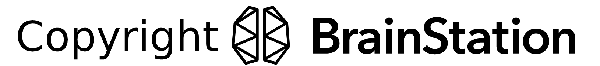
    </div>
</div>